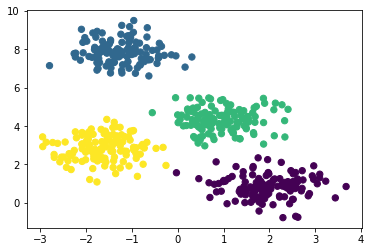

In [25]:
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s =40, cmap='viridis')
plt.show()

In [9]:
probas = gmm.predict_proba(X)
print(probas[:5].round(3))

[[ 0.     0.537  0.463  0.   ]
 [ 1.     0.     0.     0.   ]
 [ 1.     0.     0.     0.   ]
 [ 0.     1.     0.     0.   ]
 [ 1.     0.     0.     0.   ]]


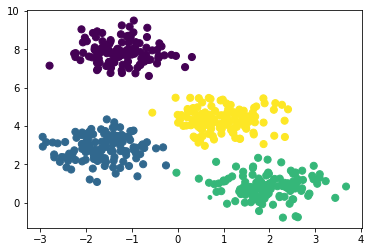

In [22]:
size = 50 * probas.max(1) ** 2
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=size)
plt.show()

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

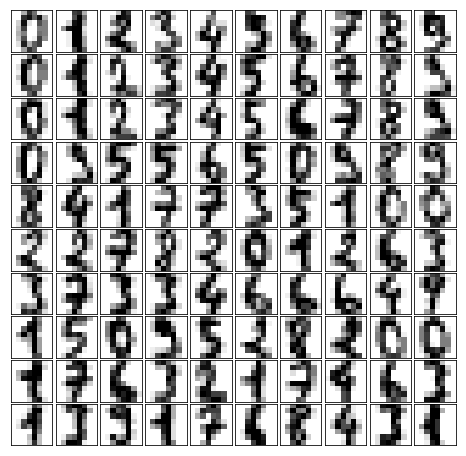

In [33]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8,8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8,8), cmap='binary')
        im.set_clim(0,16)
plot_digits(digits.data)
plt.show()

In [35]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

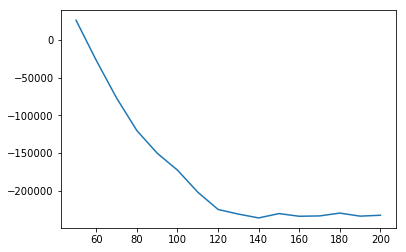

In [38]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)
plt.show()

In [44]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [47]:
data_new = gmm(110, random_state=0)
data_new.shape

TypeError: 'GaussianMixture' object is not callable